In [15]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Train the model

In [16]:
model = YOLO('yolov8n-pose.pt')
model.train(data='thermal-dataset.yaml', epochs=1, save=True)

Ultralytics YOLOv8.0.112 🚀 Python-3.11.3 torch-2.0.1 CPU
yolo/engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=thermal-dataset.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None,

## Evaluate

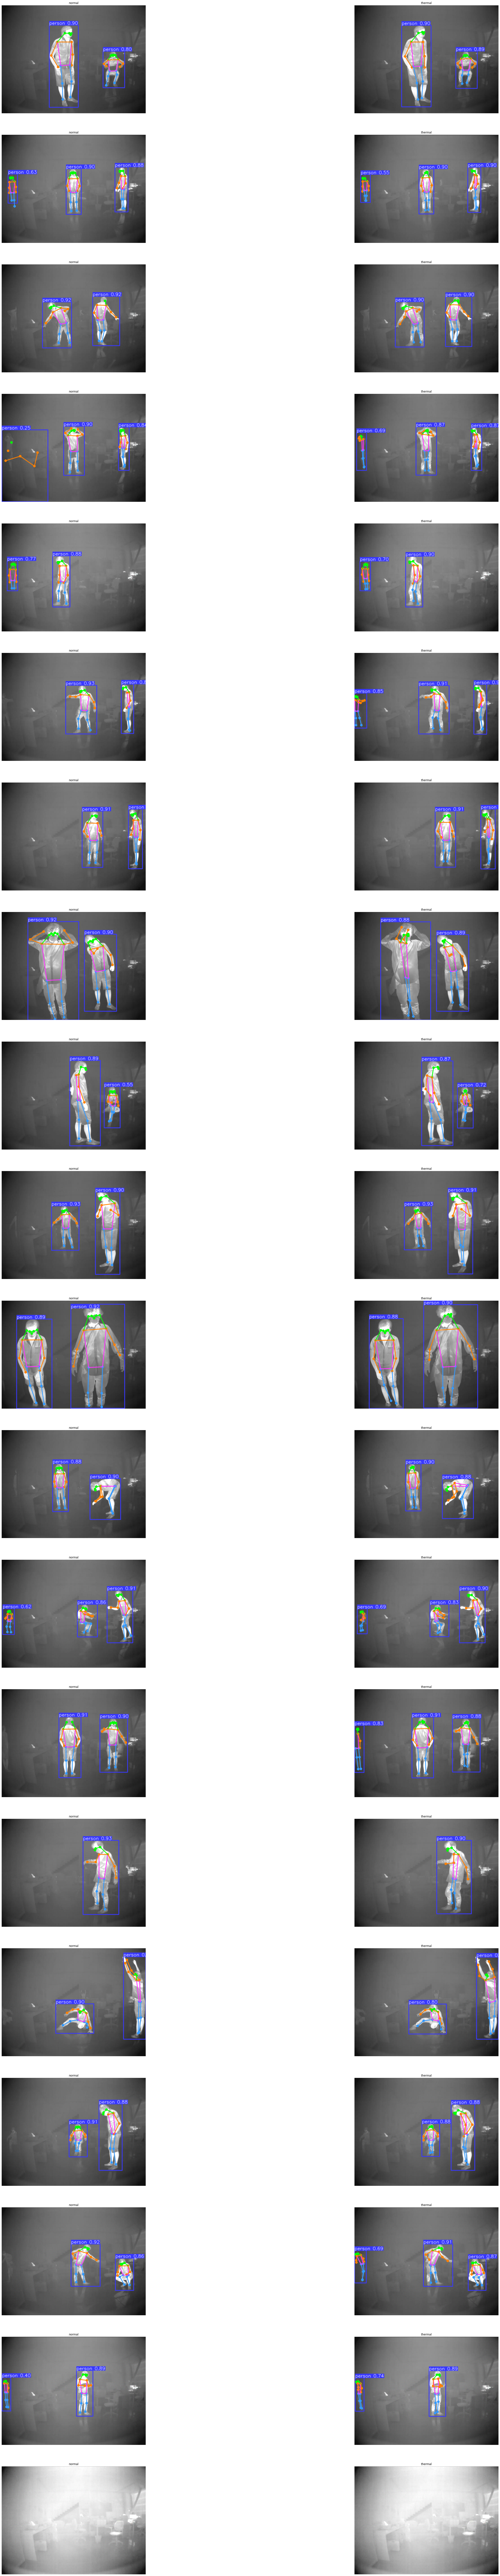

In [17]:
model_yolov8_pose = YOLO('yolov8n-pose.pt')
model_ft_thermal = YOLO('runs/pose/train/weights/best.pt') # Change this according with previous output

test_images= 20
fig, axes = plt.subplots(nrows=test_images, ncols=2, figsize=(50,200))


for i, image in enumerate(os.listdir('test')[:test_images]):

    results_yolov8_pose = model_yolov8_pose('test/' + image, verbose=False)
    results_ft_thermal = model_ft_thermal('test/' + image, verbose=False)
    
    axes[i, 0].imshow(results_yolov8_pose[0].plot())
    axes[i, 0].set_axis_off()
    axes[i, 0].set_title('normal')

    axes[i, 1].imshow(results_ft_thermal[0].plot())
    axes[i, 1].set_axis_off()
    axes[i, 1].set_title('thermal')

